<a href="https://colab.research.google.com/github/Ryansaja/Projek_Kuliah/blob/main/tugas_praktikum_metode_sakamoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 2.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Domain variabel
x_temp     = np.arange(35, 41, 0.1)
x_pulse    = np.arange(60, 141, 1)
x_priority = np.arange(0, 101, 1)

# Fungsi keanggotaan
temp_normal  = fuzz.trimf(x_temp,  [35, 36.5, 38])
temp_high    = fuzz.trimf(x_temp,  [37, 38.5, 40])

pulse_normal = fuzz.trimf(x_pulse, [60, 80, 100])
pulse_fast   = fuzz.trimf(x_pulse, [90, 115, 140])

# Output (monoton untuk Tsukamoto)
priority_low  = fuzz.trimf(x_priority, [0, 0, 50])
priority_med  = fuzz.trimf(x_priority, [25, 50, 75])
priority_high = fuzz.trimf(x_priority, [50, 100, 100])

# Input pasien
temp_in  = 38.0
pulse_in = 110

# Fuzzifikasi
mu_temp_normal  = fuzz.interp_membership(x_temp,  temp_normal,  temp_in)
mu_temp_high    = fuzz.interp_membership(x_temp,  temp_high,    temp_in)
mu_pulse_normal = fuzz.interp_membership(x_pulse, pulse_normal, pulse_in)
mu_pulse_fast   = fuzz.interp_membership(x_pulse, pulse_fast,   pulse_in)

print(f"Derajat keanggotaan suhu: Normal={mu_temp_normal:.2f}, Tinggi={mu_temp_high:.2f}")
print(f"Derajat keanggotaan nadi: Normal={mu_pulse_normal:.2f}, Cepat={mu_pulse_fast:.2f}")

# Rule evaluation
# Rule 1: Jika suhu normal dan nadi normal → prioritas rendah
alpha1 = min(mu_temp_normal, mu_pulse_normal)

# Rule 2: Jika suhu tinggi atau nadi cepat → prioritas tinggi
alpha2 = max(mu_temp_high, mu_pulse_fast)

# Konsekuen Tsukamoto
z1 = 50 * (1 - alpha1)        # rendah (menurun)
z2 = 50 + 50 * alpha2         # tinggi (meningkat)

# Defuzzifikasi
Z = (alpha1 * z1 + alpha2 * z2) / (alpha1 + alpha2) if (alpha1 + alpha2) != 0 else 0

print("\n=== Hasil inferensi Tsukamoto ===")
print(f"alpha1 = {alpha1:.2f}, z1 = {z1:.2f}")
print(f"alpha2 = {alpha2:.2f}, z2 = {z2:.2f}")
print(f"Output (Z*) = {Z:.2f}")


Derajat keanggotaan suhu: Normal=0.00, Tinggi=0.67
Derajat keanggotaan nadi: Normal=0.00, Cepat=0.80

=== Hasil inferensi Tsukamoto ===
alpha1 = 0.00, z1 = 50.00
alpha2 = 0.80, z2 = 90.00
Output (Z*) = 90.00


Derajat keanggotaan suhu : Normal = 0.00, Tinggi = 0.67
Derajat keanggotaan nadi : Normal = 0.00, Cepat  = 0.80

=== Hasil inferensi Tsukamoto ===
alpha1 = 0.00, z1 = 50.00
alpha2 = 0.80, z2 = 90.00
Output (Z*) = 90.00


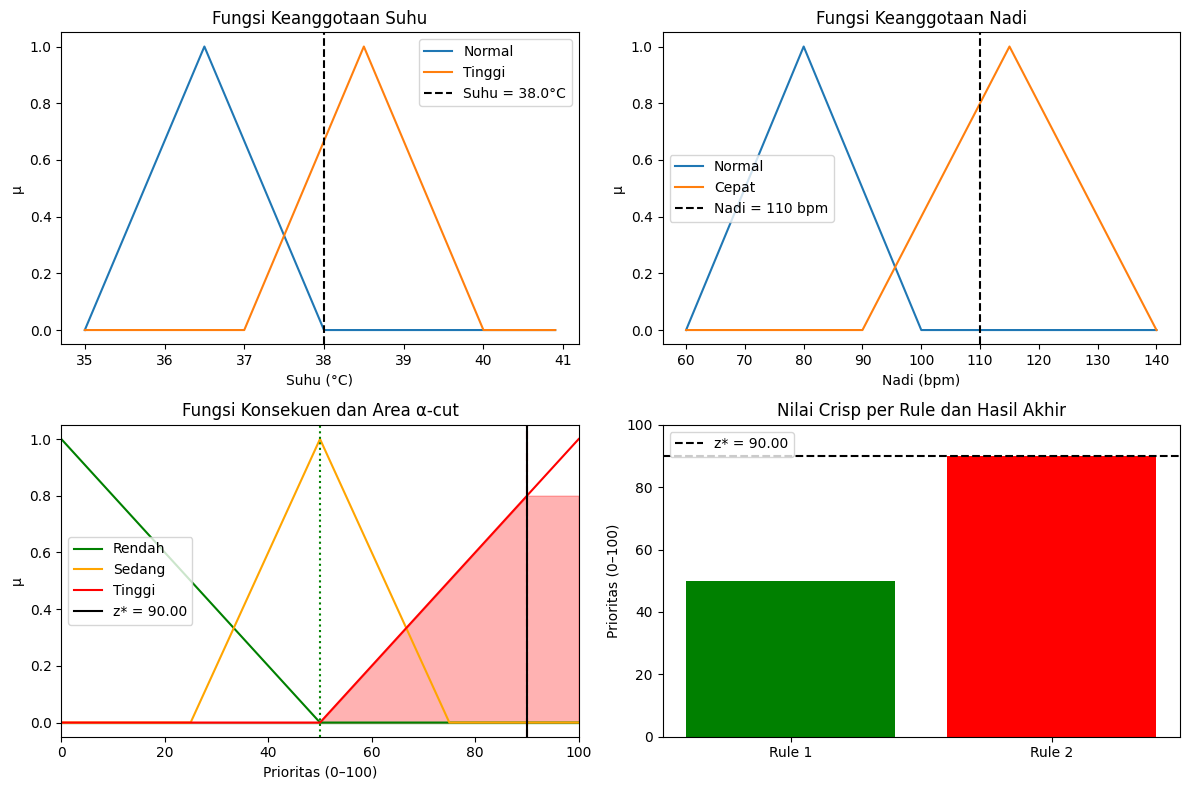

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ========= Helper Fuzzy Functions (pengganti skfuzzy) =========
def trimf(x, params):
    a, b, c = params
    x = np.asarray(x)
    y = np.zeros_like(x, dtype=float)

    # sisi naik
    idx = np.logical_and(a < x, x <= b)
    y[idx] = (x[idx] - a) / (b - a)

    # puncak
    y[x == b] = 1.0

    # sisi turun
    idx = np.logical_and(b < x, x < c)
    y[idx] = (c - x[idx]) / (c - b)

    # di luar [a, c] -> 0 (default)
    return y

def interp_membership(x, mf, value):
    x = np.asarray(x)
    mf = np.asarray(mf)
    return float(np.interp(value, x, mf))


# ========= Domain variabel =========
x_temp     = np.arange(35, 41, 0.1)
x_pulse    = np.arange(60, 141, 1)
x_priority = np.arange(0, 101, 1)

# ========= Fungsi keanggotaan =========
temp_normal  = trimf(x_temp,  [35, 36.5, 38])
temp_high    = trimf(x_temp,  [37, 38.5, 40])

pulse_normal = trimf(x_pulse, [60, 80, 100])
pulse_fast   = trimf(x_pulse, [90, 115, 140])

priority_low  = trimf(x_priority, [0, 0, 50])
priority_med  = trimf(x_priority, [25, 50, 75])
priority_high = trimf(x_priority, [50, 100, 100])

# ========= Input pasien =========
temp_in  = 38.0
pulse_in = 110

# ========= Fuzzifikasi =========
mu_temp_normal  = interp_membership(x_temp,  temp_normal,  temp_in)
mu_temp_high    = interp_membership(x_temp,  temp_high,    temp_in)
mu_pulse_normal = interp_membership(x_pulse, pulse_normal, pulse_in)
mu_pulse_fast   = interp_membership(x_pulse, pulse_fast,   pulse_in)

print(f"Derajat keanggotaan suhu : Normal = {mu_temp_normal:.2f}, Tinggi = {mu_temp_high:.2f}")
print(f"Derajat keanggotaan nadi : Normal = {mu_pulse_normal:.2f}, Cepat  = {mu_pulse_fast:.2f}")

# ========= Rule evaluation =========
# Rule 1: Jika suhu normal dan nadi normal → prioritas rendah
alpha1 = min(mu_temp_normal, mu_pulse_normal)

# Rule 2: Jika suhu tinggi atau nadi cepat → prioritas tinggi
alpha2 = max(mu_temp_high, mu_pulse_fast)

# ========= Konsekuen Tsukamoto =========
z1 = 50 * (1 - alpha1)        # rendah (menurun 0–50)
z2 = 50 + 50 * alpha2         # tinggi (meningkat 50–100)

# ========= Defuzzifikasi =========
if (alpha1 + alpha2) == 0:
    Z = 0.0
else:
    Z = (alpha1 * z1 + alpha2 * z2) / (alpha1 + alpha2)

print("\n=== Hasil inferensi Tsukamoto ===")
print(f"alpha1 = {alpha1:.2f}, z1 = {z1:.2f}")
print(f"alpha2 = {alpha2:.2f}, z2 = {z2:.2f}")
print(f"Output (Z*) = {Z:.2f}")

# ========= Visualisasi =========
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# --- 1) Fungsi Keanggotaan Suhu ---
axs[0, 0].plot(x_temp, temp_normal, label='Normal')
axs[0, 0].plot(x_temp, temp_high,   label='Tinggi')
axs[0, 0].axvline(temp_in, linestyle='--', color='k', label=f'Suhu = {temp_in}°C')
axs[0, 0].set_title('Fungsi Keanggotaan Suhu')
axs[0, 0].set_xlabel('Suhu (°C)')
axs[0, 0].set_ylabel('μ')
axs[0, 0].legend()
axs[0, 0].set_ylim(-0.05, 1.05)

# --- 2) Fungsi Keanggotaan Nadi ---
axs[0, 1].plot(x_pulse, pulse_normal, label='Normal')
axs[0, 1].plot(x_pulse, pulse_fast,   label='Cepat')
axs[0, 1].axvline(pulse_in, linestyle='--', color='k', label=f'Nadi = {pulse_in} bpm')
axs[0, 1].set_title('Fungsi Keanggotaan Nadi')
axs[0, 1].set_xlabel('Nadi (bpm)')
axs[0, 1].set_ylabel('μ')
axs[0, 1].legend()
axs[0, 1].set_ylim(-0.05, 1.05)

# --- 3) Fungsi Konsekuen dan Area α-cut ---
axs[1, 0].plot(x_priority, priority_low,  'g',     label='Rendah')
axs[1, 0].plot(x_priority, priority_med,  'orange', label='Sedang')
axs[1, 0].plot(x_priority, priority_high, 'r',      label='Tinggi')

# Area a-cut (clipped)
# Rule 1 (rendah) – di sini alpha1 = 0, jadi tidak kelihatan, tapi tetap ditulis
axs[1, 0].fill_between(x_priority,
                       0,
                       np.minimum(alpha1, priority_low),
                       alpha=0.3, color='g')

# Rule 2 (tinggi)
axs[1, 0].fill_between(x_priority,
                       0,
                       np.minimum(alpha2, priority_high),
                       alpha=0.3, color='r')

# Garis vertikal z1, z2, dan Z*
axs[1, 0].axvline(z1, linestyle=':', color='g')
axs[1, 0].axvline(z2, linestyle='--', color='r')
axs[1, 0].axvline(Z,  linestyle='-', color='k', label=f'z* = {Z:.2f}')

axs[1, 0].set_title('Fungsi Konsekuen dan Area α-cut')
axs[1, 0].set_xlabel('Prioritas (0–100)')
axs[1, 0].set_ylabel('μ')
axs[1, 0].set_xlim(0, 100)
axs[1, 0].set_ylim(-0.05, 1.05)
axs[1, 0].legend()

# --- 4) Nilai Crisp per Rule dan Hasil Akhir ---
axs[1, 1].bar(['Rule 1', 'Rule 2'], [z1, z2], color=['g', 'r'])
axs[1, 1].axhline(Z, linestyle='--', color='k', label=f'z* = {Z:.2f}')
axs[1, 1].set_ylabel('Prioritas (0–100)')
axs[1, 1].set_title('Nilai Crisp per Rule dan Hasil Akhir')
axs[1, 1].set_ylim(0, 100)
axs[1, 1].legend()

plt.tight_layout()
plt.show()
